In [1]:
#Importing all required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#Reading the data file
FundRating=pd.read_csv('Rating.csv')

/Users/chai3/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (29,31,32,64,78,101,117) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
FundRating.head(10)
#From below data, we can see that most of the values are numeric. We do have NAN values present in the data set
#Let's analyze it further

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,a_rating,aaa_rating,aa_rating,bbb_rating,...,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,9.15,0.0,0.10,7.31,11.36,11.13,13.04,30.89,9.90,18.48,...,1.28,2.68,0.00,0.11,3.87,0.01,0.01,0.06,0.33,3.95
1,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
2,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
3,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
4,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
5,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
6,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
7,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
8,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
9,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24


In [4]:
#Data pre-processing – Perform all the necessary pre-processing on the data ready to be fed to an Unsupervised algorithm 

In [5]:
FundRating.info()
#The data set has 846 rows and 19 columns, all are numeric except column 'class' which is of type object. 
#This indicates that there is categorical variable which needs to represented in numeric format.
#From below data it is evident that not all 846 rows has values, some cells are empty 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 126 entries, bb_rating to 10_years_return_category
dtypes: float64(109), int64(1), object(16)
memory usage: 24.0+ MB


In [6]:
FundRating.describe().transpose()
#Inference: From below data we can conclude that outlier values  and negetive values are present in data set.

,count,mean,std,min,25%,50%,75%,max
bb_rating,24886.0,3.473804,8.299747,0.00,0.00,0.00,2.45,80.47
us_govt_bond_rating,24886.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
below_b_rating,24886.0,0.827525,2.700019,-0.02,0.00,0.00,0.10,42.30
others_rating,24886.0,1.666769,6.885158,-68.21,0.00,0.00,0.33,100.00
maturity_bond,8093.0,7.765444,4.148558,0.00,5.46,7.29,8.92,29.30
...,...,...,...,...,...,...,...,...
10_years_alpha_category,24894.0,0.001136,0.027795,-0.11,-0.02,0.00,0.01,0.10
10_years_beta_category,24894.0,0.009076,0.005493,-0.02,0.01,0.01,0.01,0.12
10years_category_std,24894.0,0.109399,0.055202,0.00,0.06,0.12,0.15,0.34
10_years_return_mean_annual_fund,16416.0,0.858579,0.458993,-3.64,0.53,0.90,1.20,3.28


In [7]:
#Taking variables one bye one and proceeding with required data treatments in below steps.
# Also we will perform univariate/bivariate (independent variable/dependent variable) analysis to understand the 
#each attributes and choose carefully which all attributes have to be a part of the analysis and why

In [8]:
FundRating=FundRating.replace(",", "",regex=True)
FundRating=FundRating.replace(">", "",regex=True)
FundRating=FundRating.replace("<","",regex=True)

In [9]:
# import numpy as np
# FundRating["pb_ratio"]=np.where(FundRating["pb_ratio"]>(5.085), (5.085), FundRating["pb_ratio"])
# FundRating["pb_ratio"]=np.where(FundRating["pb_ratio"]<(-2.155), (-2.155), FundRating["pb_ratio"])

# FundRating["fund_ratio_net_annual_expense"]=np.where(FundRating["fund_ratio_net_annual_expense"]>(2.52), (2.52), FundRating["fund_ratio_net_annual_expense"])
# FundRating["fund_ratio_net_annual_expense"]=np.where(FundRating["fund_ratio_net_annual_expense"]<(-0.3600), (-0.3600), FundRating["fund_ratio_net_annual_expense"])

# FundRating["portfolio_cyclical_consumer_allocation"]=np.where(FundRating["portfolio_cyclical_consumer_allocation"]>(33.0), (33.0), FundRating["portfolio_cyclical_consumer_allocation"])
# FundRating["portfolio_cyclical_consumer_allocation"]=np.where(FundRating["portfolio_cyclical_consumer_allocation"]<(-19.799), (-19.799), FundRating["portfolio_cyclical_consumer_allocation"])

# FundRating["portfolio_utils_allocation"]=np.where(FundRating["portfolio_utils_allocation"]>(8.35), (8.35), FundRating["portfolio_utils_allocation"])
# FundRating["portfolio_utils_allocation"]=np.where(FundRating["portfolio_utils_allocation"]<(-5.01), (-5.01), FundRating["portfolio_utils_allocation"])

# FundRating["portfolio_property_allocation"]=np.where(FundRating["portfolio_property_allocation"]>(11.08125), (11.08125), FundRating["portfolio_property_allocation"])
# FundRating["portfolio_property_allocation"]=np.where(FundRating["portfolio_property_allocation"]<(-6.6487), (-6.6487), FundRating["portfolio_property_allocation"])

# FundRating["portfolio_healthcare_allocation"]=np.where(FundRating["portfolio_healthcare_allocation"]>(33.875), (33.875), FundRating["portfolio_healthcare_allocation"])
# FundRating["portfolio_healthcare_allocation"]=np.where(FundRating["portfolio_healthcare_allocation"]<(-20.3250), (-20.3250), FundRating["portfolio_healthcare_allocation"])

# FundRating["portfolio_consumer_defence_allocation"]=np.where(FundRating["portfolio_consumer_defence_allocation"]>(19.675), (19.675), FundRating["portfolio_consumer_defence_allocation"])
# FundRating["portfolio_consumer_defence_allocation"]=np.where(FundRating["portfolio_consumer_defence_allocation"]<(-11.805), (-11.805), FundRating["portfolio_consumer_defence_allocation"])

# FundRating["portfolio_energy_allocation"]=np.where(FundRating["portfolio_energy_allocation"]>(15.5562), (15.5562), FundRating["portfolio_energy_allocation"])
# FundRating["portfolio_energy_allocation"]=np.where(FundRating["portfolio_energy_allocation"]<(-9.3337), (-9.3337), FundRating["portfolio_energy_allocation"])

# FundRating["portfolio_materials_basic_allocation"]=np.where(FundRating["portfolio_materials_basic_allocation"]>(12.625), (12.625), FundRating["portfolio_materials_basic_allocation"])
# FundRating["portfolio_materials_basic_allocation"]=np.where(FundRating["portfolio_materials_basic_allocation"]<(-7.5749), (-7.5749), FundRating["portfolio_materials_basic_allocation"])

# FundRating["portfolio_tech_allocation"]=np.where(FundRating["portfolio_tech_allocation"]>(48.97499), (48.97499), FundRating["portfolio_tech_allocation"])
# FundRating["portfolio_tech_allocation"]=np.where(FundRating["portfolio_tech_allocation"]<(-29.3849), (-29.3849), FundRating["portfolio_tech_allocation"])

# FundRating["portfolio_industrials_allocation"]=np.where(FundRating["portfolio_industrials_allocation"]>(31.825), (31.825), FundRating["portfolio_industrials_allocation"])
# FundRating["portfolio_industrials_allocation"]=np.where(FundRating["portfolio_industrials_allocation"]<(-19.095), (-19.095), FundRating["portfolio_industrials_allocation"])

# FundRating["portfolio_financial_services"]=np.where(FundRating["portfolio_financial_services"]>(44.75), (44.75), FundRating["portfolio_financial_services"])
# FundRating["portfolio_financial_services"]=np.where(FundRating["portfolio_financial_services"]<(-26.8499), (-26.8499), FundRating["portfolio_financial_services"])

# FundRating["portfolio_communication_allocation"]=np.where(FundRating["portfolio_communication_allocation"]>(8.5), (8.5), FundRating["portfolio_communication_allocation"])
# FundRating["portfolio_communication_allocation"]=np.where(FundRating["portfolio_communication_allocation"]<(-5.1), (-5.1), FundRating["portfolio_communication_allocation"])
    
# FundRating["duration_bond"]=np.where(FundRating["duration_bond"]>(4.8), (4.8), FundRating["duration_bond"])
# FundRating["duration_bond"]=np.where(FundRating["duration_bond"]<(4.8), (4.8), FundRating["duration_bond"])

# FundRating["bbb_rating"]=np.where(FundRating["bbb_rating"]>(28.3499), (28.3499), FundRating["bbb_rating"])
# FundRating["bbb_rating"]=np.where(FundRating["bbb_rating"]<(-17.009), (-17.009), FundRating["bbb_rating"])

# FundRating["aa_rating"]=np.where(FundRating["aa_rating"]>(7.4750), (7.4750), FundRating["aa_rating"])
# FundRating["aa_rating"]=np.where(FundRating["aa_rating"]<(-4.485), (-4.485), FundRating["aa_rating"])

# FundRating["aaa_rating"]=np.where(FundRating["aaa_rating"]>(46.0500), (46.0500), FundRating["aaa_rating"])
# FundRating["aaa_rating"]=np.where(FundRating["aaa_rating"]<(-27.6300), (-27.6300), FundRating["aaa_rating"])

# FundRating["a_rating"]=np.where(FundRating["a_rating"]>(20.6937), (20.6937), FundRating["a_rating"])
# FundRating["a_rating"]=np.where(FundRating["a_rating"]<(-12.4162), (-12.4162), FundRating["a_rating"])

# FundRating["maturity_bond"]=np.where(FundRating["maturity_bond"]>(7.29), (7.29), FundRating["maturity_bond"])
# FundRating["maturity_bond"]=np.where(FundRating["maturity_bond"]<(7.29), (7.29), FundRating["maturity_bond"])

# FundRating["others_rating"]=np.where(FundRating["others_rating"]>(0.8), (0.8), FundRating["others_rating"])
# FundRating["others_rating"]=np.where(FundRating["others_rating"]<(-0.48), (-0.48), FundRating["others_rating"])

# FundRating["2013_return_fund"]=np.where(FundRating["2013_return_fund"]>(47.7037), (47.7037), FundRating["2013_return_fund"])
# FundRating["2013_return_fund"]=np.where(FundRating["2013_return_fund"]<(-13.1862), (-13.1862), FundRating["2013_return_fund"])

# FundRating["fund_return_3months"]=np.where(FundRating["fund_return_3months"]>(26.2000), (26.2000), FundRating["fund_return_3months"])
# FundRating["fund_return_3months"]=np.where(FundRating["fund_return_3months"]<(-9.0), (-9.0), FundRating["fund_return_3months"])

# FundRating["ytd_return_category"]=np.where(FundRating["ytd_return_category"]>(24.82), (24.82), FundRating["ytd_return_category"])
# FundRating["ytd_return_category"]=np.where(FundRating["ytd_return_category"]<(-6.8599), (-6.8599), FundRating["ytd_return_category"])

# FundRating["2017_category_return"]=np.where(FundRating["2017_category_return"]>(44.045), (44.045), FundRating["2017_category_return"])
# FundRating["2017_category_return"]=np.where(FundRating["2017_category_return"]<(-16.0750), (-16.0750), FundRating["2017_category_return"])

# FundRating["1_year_return_fund"]=np.where(FundRating["1_year_return_fund"]>(12.795), (12.795), FundRating["1_year_return_fund"])
# FundRating["1_year_return_fund"]=np.where(FundRating["1_year_return_fund"]<(-7.7250), (-7.7250), FundRating["1_year_return_fund"])

# FundRating["2015_return_fund"]=np.where(FundRating["2015_return_fund"]>(4.79), (4.79), FundRating["2015_return_fund"])
# FundRating["2015_return_fund"]=np.where(FundRating["2015_return_fund"]<(-7.21), (-7.21), FundRating["2015_return_fund"])

# FundRating["portfolio_convertable"]=np.where(FundRating["portfolio_convertable"]>(0.1750), (0.1750), FundRating["portfolio_convertable"])
# FundRating["portfolio_convertable"]=np.where(FundRating["portfolio_convertable"]<(-0.1050), (-0.1050), FundRating["portfolio_convertable"])

# FundRating["3_months_return_category"]=np.where(FundRating["3_months_return_category"]>(24.82), (24.82), FundRating["3_months_return_category"])
# FundRating["3_months_return_category"]=np.where(FundRating["3_months_return_category"]<(-6.8599), (-6.8599), FundRating["3_months_return_category"])

# FundRating["portfolio_others"]=np.where(FundRating["portfolio_others"]>(0.7000), (0.7000), FundRating["portfolio_others"])
# FundRating["portfolio_others"]=np.where(FundRating["portfolio_others"]<(-0.4200), (-0.4200), FundRating["portfolio_others"])

# FundRating["2016_return_fund"]=np.where(FundRating["2016_return_fund"]>(19.7200), (19.7200), FundRating["2016_return_fund"])
# FundRating["2016_return_fund"]=np.where(FundRating["2016_return_fund"]<(-7.160), (-7.160), FundRating["2016_return_fund"])

# FundRating["stock_percent_of_portfolio"]=np.where(FundRating["stock_percent_of_portfolio"]>(243.11), (243.11), FundRating["stock_percent_of_portfolio"])
# FundRating["stock_percent_of_portfolio"]=np.where(FundRating["stock_percent_of_portfolio"]<(-144.95), (-144.95), FundRating["stock_percent_of_portfolio"])

# FundRating["2016_return_category"]=np.where(FundRating["2016_return_category"]>(18.28), (18.28), FundRating["2016_return_category"])
# FundRating["2016_return_category"]=np.where(FundRating["2016_return_category"]<(-5.7999), (-5.7999), FundRating["2016_return_category"])

# FundRating["2011_return_fund"]=np.where(FundRating["2011_return_fund"]>(2.945), (2.945), FundRating["2011_return_fund"])
# FundRating["2011_return_fund"]=np.where(FundRating["2011_return_fund"]<(-4.055), (-4.055), FundRating["2011_return_fund"])

# FundRating["2010_return_fund"]=np.where(FundRating["2010_return_fund"]>(13.5962), (13.5962), FundRating["2010_return_fund"])
# FundRating["2010_return_fund"]=np.where(FundRating["2010_return_fund"]<(12.6), (12.6), FundRating["2010_return_fund"])

# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]>(21.2299), (21.2299), FundRating["fund_return_3years"])
# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]<(-8.2099), (-8.2099), FundRating["fund_return_3years"])

# FundRating["2012_fund_return"]=np.where(FundRating["2012_fund_return"]>(18.4049), (18.4049), FundRating["2012_fund_return"])
# FundRating["2012_fund_return"]=np.where(FundRating["2012_fund_return"]<(8.5250), (8.5250), FundRating["2012_fund_return"])

# FundRating["2018_return_fund"]=np.where(FundRating["2018_return_fund"]>(10.73), (10.73), FundRating["2018_return_fund"])
# FundRating["2018_return_fund"]=np.where(FundRating["2018_return_fund"]<(-22.79), (-22.79), FundRating["2018_return_fund"])

# FundRating["2017_return_fund"]=np.where(FundRating["2017_return_fund"]>(42.2237), (42.2237), FundRating["2017_return_fund"])
# FundRating["2017_return_fund"]=np.where(FundRating["2017_return_fund"]<(-14.1062), (-14.1062), FundRating["2017_return_fund"])

# FundRating["category_ratio_net_annual_expense"]=np.where(FundRating["category_ratio_net_annual_expense"]>(1.7349), (1.7349), FundRating["category_ratio_net_annual_expense"])
# FundRating["category_ratio_net_annual_expense"]=np.where(FundRating["category_ratio_net_annual_expense"]<(0.2550), (0.2550), FundRating["category_ratio_net_annual_expense"])

# FundRating["category_return_2015"]=np.where(FundRating["category_return_2015"]>(1.4950), (1.4950), FundRating["category_return_2015"])
# FundRating["category_return_2015"]=np.where(FundRating["category_return_2015"]<(-5.025), (-5.025), FundRating["category_return_2015"])

# FundRating["1_month_fund_return"]=np.where(FundRating["1_month_fund_return"]>(3.75), (3.75), FundRating["1_month_fund_return"])
# FundRating["1_month_fund_return"]=np.where(FundRating["1_month_fund_return"]<(-1.69), (-1.69), FundRating["1_month_fund_return"])

# FundRating["bond_percentage_of_porfolio"]=np.where(FundRating["bond_percentage_of_porfolio"]>(159.25), (159.25), FundRating["bond_percentage_of_porfolio"])
# FundRating["bond_percentage_of_porfolio"]=np.where(FundRating["bond_percentage_of_porfolio"]<(-95.5500), (-95.5500), FundRating["bond_percentage_of_porfolio"])

# FundRating["portfolio_preferred"]=np.where(FundRating["portfolio_preferred"]>(0.025), (0.025), FundRating["portfolio_preferred"])
# FundRating["portfolio_preferred"]=np.where(FundRating["portfolio_preferred"]<(-0.015), (-0.015), FundRating["portfolio_preferred"])

# FundRating["2010_return_category"]=np.where(FundRating["2010_return_category"]>(14.115), (14.115), FundRating["2010_return_category"])
# FundRating["2010_return_category"]=np.where(FundRating["2010_return_category"]<(13.115), (13.115), FundRating["2010_return_category"])

# FundRating["2013_category_return"]=np.where(FundRating["2013_category_return"]>(52.13), (52.13), FundRating["2013_category_return"])
# FundRating["2013_category_return"]=np.where(FundRating["2013_category_return"]<(-19.71), (-19.71), FundRating["2013_category_return"])

# FundRating["3_years_alpha_fund"]=np.where(FundRating["3_years_alpha_fund"]>(4.6599), (4.6599), FundRating["3_years_alpha_fund"])
# FundRating["3_years_alpha_fund"]=np.where(FundRating["3_years_alpha_fund"]<(-5.8999), (-5.8999), FundRating["3_years_alpha_fund"])

# FundRating["3years_category_std"]=np.where(FundRating["3years_category_std"]>(0.265), (0.265), FundRating["3years_category_std"])
# FundRating["3years_category_std"]=np.where(FundRating["3years_category_std"]<(-0.095), (-0.095), FundRating["3years_category_std"])

# FundRating["3yrs_sharpe_ratio_fund"]=np.where(FundRating["3yrs_sharpe_ratio_fund"]>(1.6849), (1.6849), FundRating["3yrs_sharpe_ratio_fund"])
# FundRating["3yrs_sharpe_ratio_fund"]=np.where(FundRating["3yrs_sharpe_ratio_fund"]<(-0.2749), (-0.2749), FundRating["3yrs_sharpe_ratio_fund"])

# FundRating["3yrs_treynor_ratio_category"]=np.where(FundRating["3yrs_treynor_ratio_category"]>(0.1750), (0.1750), FundRating["3yrs_treynor_ratio_category"])
# FundRating["3yrs_treynor_ratio_category"]=np.where(FundRating["3yrs_treynor_ratio_category"]<(-0.0250), (-0.0250), FundRating["3yrs_treynor_ratio_category"])

# FundRating["3_years_return_mean_annual_fund"]=np.where(FundRating["3_years_return_mean_annual_fund"]>(1.635), (1.635), FundRating["3_years_return_mean_annual_fund"])
# FundRating["3_years_return_mean_annual_fund"]=np.where(FundRating["3_years_return_mean_annual_fund"]<(-0.405), (-0.405), FundRating["3_years_return_mean_annual_fund"])

# FundRating["fund_beta_3years"]=np.where(FundRating["fund_beta_3years"]>(1.6150), (1.6150), FundRating["fund_beta_3years"])
# FundRating["fund_beta_3years"]=np.where(FundRating["fund_beta_3years"]<(0.3), (0.3), FundRating["fund_beta_3years"])

# FundRating["3years_fund_r_squared"]=np.where(FundRating["3years_fund_r_squared"]>(131.43), (131.43), FundRating["3years_fund_r_squared"])
# FundRating["3years_fund_r_squared"]=np.where(FundRating["3years_fund_r_squared"]<(26.55), (26.55), FundRating["3years_fund_r_squared"])

# FundRating["3years_fund_std"]=np.where(FundRating["3years_fund_std"]>(23.68), (23.68), FundRating["3years_fund_std"])
# FundRating["3years_fund_std"]=np.where(FundRating["3years_fund_std"]<(-6.9599), (-6.9599), FundRating["3years_fund_std"])

# FundRating["category_beta_3years"]=np.where(FundRating["category_beta_3years"]>(0.01), (0.01), FundRating["category_beta_3years"])
# FundRating["category_beta_3years"]=np.where(FundRating["category_beta_3years"]<(0.01), (0.01), FundRating["category_beta_3years"])

# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]>(21.2299), (21.2299), FundRating["fund_return_3years"])
# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]<(-8.2099), (-8.2099), FundRating["fund_return_3years"])

# FundRating["3_years_alpha_category"]=np.where(FundRating["3_years_alpha_category"]>(0.015), (0.015), FundRating["3_years_alpha_category"])
# FundRating["3_years_alpha_category"]=np.where(FundRating["3_years_alpha_category"]<(-0.025), (-0.025), FundRating["3_years_alpha_category"])

# FundRating["3_years_return_mean_annual_category"]=np.where(FundRating["3_years_return_mean_annual_category"]>(0.025), (0.025), FundRating["3_years_return_mean_annual_category"])
# FundRating["3_years_return_mean_annual_category"]=np.where(FundRating["3_years_return_mean_annual_category"]<(-0.015), (-0.015), FundRating["3_years_return_mean_annual_category"])

# FundRating["3yrs_sharpe_ratio_category"]=np.where(FundRating["3yrs_sharpe_ratio_category"]>(0.025), (0.025), FundRating["3yrs_sharpe_ratio_category"])
# FundRating["3yrs_sharpe_ratio_category"]=np.where(FundRating["3yrs_sharpe_ratio_category"]<(-0.015), (-0.015), FundRating["3yrs_sharpe_ratio_category"])

# FundRating["3years_category_r_squared"]=np.where(FundRating["3years_category_r_squared"]>(1.28), (1.28), FundRating["3years_category_r_squared"])
# FundRating["3years_category_r_squared"]=np.where(FundRating["3years_category_r_squared"]<(0.24), (0.24), FundRating["3years_category_r_squared"])

# FundRating["3_years_return_category"]=np.where(FundRating["3_years_return_category"]>(18.485), (18.485), FundRating["3_years_return_category"])
# FundRating["3_years_return_category"]=np.where(FundRating["3_years_return_category"]<(-4.1149), (-4.1149), FundRating["3_years_return_category"])

# FundRating["category_r_squared_5years"]=np.where(FundRating["category_r_squared_5years"]>(1.2650), (1.2650), FundRating["category_r_squared_5years"])
# FundRating["category_r_squared_5years"]=np.where(FundRating["category_r_squared_5years"]<(0.265), (0.265), FundRating["category_r_squared_5years"])

# FundRating["5yrs_sharpe_ratio_fund"]=np.where(FundRating["5yrs_sharpe_ratio_fund"]>(1.1549), (1.1549), FundRating["5yrs_sharpe_ratio_fund"])
# FundRating["5yrs_sharpe_ratio_fund"]=np.where(FundRating["5yrs_sharpe_ratio_fund"]<(-0.08499), (-0.08499), FundRating["5yrs_sharpe_ratio_fund"])

# FundRating["5years_fund_r_squared"]=np.where(FundRating["5years_fund_r_squared"]>(125.6749), (125.6749), FundRating["5years_fund_r_squared"])
# FundRating["5years_fund_r_squared"]=np.where(FundRating["5years_fund_r_squared"]<(33.475), (33.475), FundRating["5years_fund_r_squared"])

# FundRating["5years_fund_std"]=np.where(FundRating["5years_fund_std"]>(22.4837), (22.4837), FundRating["5years_fund_std"])
# FundRating["5years_fund_std"]=np.where(FundRating["5years_fund_std"]<(-4.5662), (-4.5662), FundRating["5years_fund_std"])

# FundRating["5yrs_sharpe_ratio_category"]=np.where(FundRating["5yrs_sharpe_ratio_category"]>(0.025), (0.025), FundRating["5yrs_sharpe_ratio_category"])
# FundRating["5yrs_sharpe_ratio_category"]=np.where(FundRating["5yrs_sharpe_ratio_category"]<(-0.015), (-0.015), FundRating["5yrs_sharpe_ratio_category"])

# FundRating["5_years_alpha_fund"]=np.where(FundRating["5_years_alpha_fund"]>(3.560), (3.560), FundRating["5_years_alpha_fund"])
# FundRating["5_years_alpha_fund"]=np.where(FundRating["5_years_alpha_fund"]<(-4.84), (-4.84), FundRating["5_years_alpha_fund"])

# FundRating["5_years_beta_fund"]=np.where(FundRating["5_years_beta_fund"]>(1.4150), (1.4150), FundRating["5_years_beta_fund"])
# FundRating["5_years_beta_fund"]=np.where(FundRating["5_years_beta_fund"]<(0.5), (0.5), FundRating["5_years_beta_fund"])

# FundRating["5_years_return_mean_annual_fund"]=np.where(FundRating["5_years_return_mean_annual_fund"]>(1.0599), (1.0599), FundRating["5_years_return_mean_annual_fund"])
# FundRating["5_years_return_mean_annual_fund"]=np.where(FundRating["5_years_return_mean_annual_fund"]<(-0.2199), (-0.2199), FundRating["5_years_return_mean_annual_fund"])

# FundRating["5_years_return_mean_annual_category"]=np.where(FundRating["5_years_return_mean_annual_category"]>(0.025), (0.025), FundRating["5_years_return_mean_annual_category"])
# FundRating["5_years_return_mean_annual_category"]=np.where(FundRating["5_years_return_mean_annual_category"]<(-0.015), (-0.015), FundRating["5_years_return_mean_annual_category"])

# FundRating["5yrs_treynor_ratio_category"]=np.where(FundRating["5yrs_treynor_ratio_category"]>(0.12), (0.12), FundRating["5yrs_treynor_ratio_category"])
# FundRating["5yrs_treynor_ratio_category"]=np.where(FundRating["5yrs_treynor_ratio_category"]<(-0.0399), (-0.0399), FundRating["5yrs_treynor_ratio_category"])

# FundRating["5_years_return_fund"]=np.where(FundRating["5_years_return_fund"]>(14.375), (14.375), FundRating["5_years_return_fund"])
# FundRating["5_years_return_fund"]=np.where(FundRating["5_years_return_fund"]<(-6.625), (-6.625), FundRating["5_years_return_fund"])

# FundRating["5_years_alpha_category"]=np.where(FundRating["5_years_alpha_category"]>(0.03), (0.03), FundRating["5_years_alpha_category"])
# FundRating["5_years_alpha_category"]=np.where(FundRating["5_years_alpha_category"]<(-0.05), (-0.05), FundRating["5_years_alpha_category"])

# FundRating["5_years_beta_category"]=np.where(FundRating["5_years_beta_category"]>(0.01), (0.01), FundRating["5_years_beta_category"])
# FundRating["5_years_beta_category"]=np.where(FundRating["5_years_beta_category"]<(0.01), (0.01), FundRating["5_years_beta_category"])

# FundRating["5years_category_std"]=np.where(FundRating["5years_category_std"]>(0.25), (0.25), FundRating["5years_category_std"])
# FundRating["5years_category_std"]=np.where(FundRating["5years_category_std"]<(-0.0699), (-0.0699), FundRating["5years_category_std"])

# FundRating["10years_fund_r_squared"]=np.where(FundRating["10years_fund_r_squared"]>(105.2350), (105.2350), FundRating["10years_fund_r_squared"])
# FundRating["10years_fund_r_squared"]=np.where(FundRating["10years_fund_r_squared"]<(66), (66), FundRating["10years_fund_r_squared"])

# FundRating["10yrs_sharpe_ratio_fund"]=np.where(FundRating["10yrs_sharpe_ratio_fund"]>(1.225), (1.225), FundRating["10yrs_sharpe_ratio_fund"])
# FundRating["10yrs_sharpe_ratio_fund"]=np.where(FundRating["10yrs_sharpe_ratio_fund"]<(0.7050), (0.7050), FundRating["10yrs_sharpe_ratio_fund"])

# FundRating["10_years_alpha_fund"]=np.where(FundRating["10_years_alpha_fund"]>(2.085), (2.085), FundRating["10_years_alpha_fund"])
# FundRating["10_years_alpha_fund"]=np.where(FundRating["10_years_alpha_fund"]<(-2.675), (-2.675), FundRating["10_years_alpha_fund"])

# FundRating["10years_fund_std"]=np.where(FundRating["10years_fund_std"]>(20.6299), (20.6299), FundRating["10years_fund_std"])
# FundRating["10years_fund_std"]=np.where(FundRating["10years_fund_std"]<(3.2), (3.2), FundRating["10years_fund_std"])

# FundRating["10yrs_sharpe_ratio_category"]=np.where(FundRating["10yrs_sharpe_ratio_category"]>(0.01), (0.01), FundRating["10yrs_sharpe_ratio_category"])
# FundRating["10yrs_sharpe_ratio_category"]=np.where(FundRating["10yrs_sharpe_ratio_category"]<(0.01), (0.01), FundRating["10yrs_sharpe_ratio_category"])

# FundRating["10_years_beta_fund"]=np.where(FundRating["10_years_beta_fund"]>(1.210), (1.210), FundRating["10_years_beta_fund"])
# FundRating["10_years_beta_fund"]=np.where(FundRating["10_years_beta_fund"]<(0.8099), (0.8099), FundRating["10_years_beta_fund"])

# FundRating["10_years_return_mean_annual_category"]=np.where(FundRating["10_years_return_mean_annual_category"]>(0.01), (0.01), FundRating["10_years_return_mean_annual_category"])
# FundRating["10_years_return_mean_annual_category"]=np.where(FundRating["10_years_return_mean_annual_category"]<(0.01), (0.01), FundRating["10_years_return_mean_annual_category"])

# FundRating["10yrs_treynor_ratio_category"]=np.where(FundRating["10yrs_treynor_ratio_category"]>(0.2450), (0.2450), FundRating["10yrs_treynor_ratio_category"])
# FundRating["10yrs_treynor_ratio_category"]=np.where(FundRating["10yrs_treynor_ratio_category"]<(-0.035), (-0.035), FundRating["10yrs_treynor_ratio_category"])

# FundRating["10_years_return_fund"]=np.where(FundRating["10_years_return_fund"]>(30.9), (30.9), FundRating["10_years_return_fund"])
# FundRating["10_years_return_fund"]=np.where(FundRating["10_years_return_fund"]<(-18.54), (-18.54), FundRating["10_years_return_fund"])

# FundRating["10_years_alpha_category"]=np.where(FundRating["10_years_alpha_category"]>(0.055), (0.055), FundRating["10_years_alpha_category"])
# FundRating["10_years_alpha_category"]=np.where(FundRating["10_years_alpha_category"]<(-0.065), (-0.065), FundRating["10_years_alpha_category"])


# FundRating["10_years_beta_category"]=np.where(FundRating["10_years_beta_category"]>(0.01), (0.01), FundRating["10_years_beta_category"])
# FundRating["10_years_beta_category"]=np.where(FundRating["10_years_beta_category"]<(0.01), (0.01), FundRating["10_years_beta_category"])

# FundRating["10years_category_std"]=np.where(FundRating["10years_category_std"]>(0.2850), (0.2850), FundRating["10years_category_std"])
# FundRating["10years_category_std"]=np.where(FundRating["10years_category_std"]<(-0.0750), (-0.0750), FundRating["10years_category_std"])

# FundRating["10_years_return_mean_annual_fund"]=np.where(FundRating["10_years_return_mean_annual_fund"]>(1.5250), (1.5250), FundRating["10_years_return_mean_annual_fund"])
# FundRating["10_years_return_mean_annual_fund"]=np.where(FundRating["10_years_return_mean_annual_fund"]<(0.29), (0.29), FundRating["10_years_return_mean_annual_fund"])

# FundRating["10_years_return_category"]=np.where(FundRating["10_years_return_category"]>(25.6399), (25.6399), FundRating["10_years_return_category"])
# FundRating["10_years_return_category"]=np.where(FundRating["10_years_return_category"]<(-5.0799), (-5.0799), FundRating["10_years_return_category"])

# FundRating["fund_return_3years.1"]=np.where(FundRating["fund_return_3years.1"]>(21.2299), (21.2299), FundRating["fund_return_3years.1"])
# FundRating["fund_return_3years.1"]=np.where(FundRating["fund_return_3years.1"]<(-8.2099), (-8.2099), FundRating["fund_return_3years.1"])

# FundRating["10years_category_r_squared"]=np.where(FundRating["10years_category_r_squared"]>(1.235), (1.235), FundRating["10years_category_r_squared"])
# FundRating["10years_category_r_squared"]=np.where(FundRating["10years_category_r_squared"]<(0.4), (0.4), FundRating["10years_category_r_squared"])

# FundRating["category_return_1month"]=np.where(FundRating["category_return_1month"]>(2.76), (2.76), FundRating["category_return_1month"])
# FundRating["category_return_1month"]=np.where(FundRating["category_return_1month"]<(-0.9199), (-0.9199), FundRating["category_return_1month"])

# FundRating["2014_return_fund"]=np.where(FundRating["2014_return_fund"]>(12.645), (12.645), FundRating["2014_return_fund"])
# FundRating["2014_return_fund"]=np.where(FundRating["2014_return_fund"]<(-2.275), (-2.275), FundRating["2014_return_fund"])

# FundRating["years_down"]=np.where(FundRating["years_down"]>(7.0), (7.0), FundRating["years_down"])
# FundRating["years_down"]=np.where(FundRating["years_down"]<(-1.0), (-1.0), FundRating["years_down"])


# FundRating["ytd_return_fund"]=np.where(FundRating["ytd_return_fund"]>(25.93), (25.93), FundRating["ytd_return_fund"])
# FundRating["ytd_return_fund"]=np.where(FundRating["ytd_return_fund"]<(-8.39), (-8.39), FundRating["ytd_return_fund"])

# FundRating["2011_return_category"]=np.where(FundRating["2011_return_category"]>(1.815), (1.815), FundRating["2011_return_category"])
# FundRating["2011_return_category"]=np.where(FundRating["2011_return_category"]<(-5.025), (-5.025), FundRating["2011_return_category"])

# FundRating["cash_percent_of_portfolio"]=np.where(FundRating["cash_percent_of_portfolio"]>(15.715), (15.715), FundRating["cash_percent_of_portfolio"])
# FundRating["cash_percent_of_portfolio"]=np.where(FundRating["cash_percent_of_portfolio"]<(-7.445), (-7.445), FundRating["cash_percent_of_portfolio"])

# FundRating["category_return_1year"]=np.where(FundRating["category_return_1year"]>(10.3099), (10.3099),FundRating["category_return_1year"])
# FundRating["category_return_1year"]=np.where(FundRating["category_return_1year"]<(-5.1299), (-5.1299),FundRating["category_return_1year"])

# FundRating["2018_return_category"]=np.where(FundRating["2018_return_category"]>(8.0950),(8.0950), FundRating["2018_return_category"])
# FundRating["2018_return_category"]=np.where(FundRating["2018_return_category"]<(-19.0650),(-19.0650),FundRating["2018_return_category"])

# FundRating["years_up"]=np.where(FundRating["years_up"]>(25.5), (25.5), FundRating["years_up"])
# FundRating["years_up"]=np.where(FundRating["years_up"]<(-10.5), (-10.5), FundRating["years_up"])


# FundRating["2012_return_category"]=np.where(FundRating["2012_return_category"]>(17.8550), (17.8550), FundRating["2012_return_category"])
# FundRating["2012_return_category"]=np.where(FundRating["2012_return_category"]<(10.13), (10.14), FundRating["2012_return_category"])

# FundRating["bb_rating"]=np.where(FundRating["bb_rating"]>(2.42), (6.05), FundRating["bb_rating"])
# FundRating["bb_rating"]=np.where(FundRating["bb_rating"]<(-3.63), (-3.63), FundRating["bb_rating"])

# FundRating["below_b_rating"]=np.where(FundRating["below_b_rating"]>(0.25),(0.25),FundRating["below_b_rating"])
# FundRating["below_b_rating"]=np.where(FundRating["below_b_rating"]<(-0.1500), (-0.1500), FundRating["below_b_rating"])

# FundRating["2014_category_return"]=np.where(FundRating["2014_category_return"]>(12.7399),(12.7399),FundRating["2014_category_return"])
# FundRating["2014_category_return"]=np.where(FundRating["2014_category_return"]< (-3.1799), (-3.1799), FundRating["2014_category_return"])

# FundRating["total_assets"]=np.where(FundRating["total_assets"]>(3908895000.0),(3908895000.0),FundRating["total_assets"])
# FundRating["total_assets"]=np.where(FundRating["total_assets"]<(-2194825000.0), (-2194825000.0), FundRating["total_assets"])

# FundRating["return_ytd"]=np.where(FundRating["return_ytd"]>(25.93),(25.93),FundRating['return_ytd'])
# FundRating["return_ytd"]=np.where(FundRating["return_ytd"]<(-8.39),(-8.39), FundRating['return_ytd'])

# FundRating["yield"]=np.where(FundRating["yield"]>(5.8800),(5.8800),FundRating['yield'])
# FundRating["yield"]=np.where(FundRating["yield"]<(-2.7600),(-2.7600), FundRating['yield'])

In [10]:
# # FundRating=replace_outlier(FundRating, "bb_rating")
# df_columns = FundRating.columns
# for i in range(df_columns.size):
#     print(df_columns[i])
#     FundRating=replace_outlier(FundRating, df_columns[i])

In [11]:
#  import numpy as np
# FundRating["pb_ratio"]=np.where(FundRating["pb_ratio"]>(4.5), FundRating["pb_ratio"].median(), FundRating["pb_ratio"])
# FundRating["pb_ratio"]=np.where(FundRating["pb_ratio"]<(-2.155), FundRating["pb_ratio"].median(), FundRating["pb_ratio"])

# FundRating["fund_ratio_net_annual_expense"]=np.where(FundRating["fund_ratio_net_annual_expense"]>(2.52), FundRating["fund_ratio_net_annual_expense"].median(), FundRating["fund_ratio_net_annual_expense"])
# FundRating["fund_ratio_net_annual_expense"]=np.where(FundRating["fund_ratio_net_annual_expense"]<(-0.3600), FundRating["fund_ratio_net_annual_expense"].median(), FundRating["fund_ratio_net_annual_expense"])

# FundRating["portfolio_cyclical_consumer_allocation"]=np.where(FundRating["portfolio_cyclical_consumer_allocation"]>(33.0), FundRating["portfolio_cyclical_consumer_allocation"].median(), FundRating["portfolio_cyclical_consumer_allocation"])
# FundRating["portfolio_cyclical_consumer_allocation"]=np.where(FundRating["portfolio_cyclical_consumer_allocation"]<(-19.799), FundRating["portfolio_cyclical_consumer_allocation"].median(), FundRating["portfolio_cyclical_consumer_allocation"])

# FundRating["portfolio_utils_allocation"]=np.where(FundRating["portfolio_utils_allocation"]>(8.35), FundRating["portfolio_utils_allocation"].median(), FundRating["portfolio_utils_allocation"])
# FundRating["portfolio_utils_allocation"]=np.where(FundRating["portfolio_utils_allocation"]<(-5.01), FundRating["portfolio_utils_allocation"].median(), FundRating["portfolio_utils_allocation"])

# FundRating["portfolio_property_allocation"]=np.where(FundRating["portfolio_property_allocation"]>(11.08125), FundRating["portfolio_property_allocation"].median(), FundRating["portfolio_property_allocation"])
# FundRating["portfolio_property_allocation"]=np.where(FundRating["portfolio_property_allocation"]<(-6.6487), FundRating["portfolio_property_allocation"].median(), FundRating["portfolio_property_allocation"])

# FundRating["portfolio_healthcare_allocation"]=np.where(FundRating["portfolio_healthcare_allocation"]>(33.875), FundRating["portfolio_healthcare_allocation"].median(), FundRating["portfolio_healthcare_allocation"])
# FundRating["portfolio_healthcare_allocation"]=np.where(FundRating["portfolio_healthcare_allocation"]<(-20.3250), FundRating["portfolio_healthcare_allocation"].median(), FundRating["portfolio_healthcare_allocation"])

# FundRating["portfolio_consumer_defence_allocation"]=np.where(FundRating["portfolio_consumer_defence_allocation"]>(19.675), FundRating["portfolio_consumer_defence_allocation"].median(), FundRating["portfolio_consumer_defence_allocation"])
# FundRating["portfolio_consumer_defence_allocation"]=np.where(FundRating["portfolio_consumer_defence_allocation"]<(-11.805), FundRating["portfolio_consumer_defence_allocation"].median(), FundRating["portfolio_consumer_defence_allocation"])

# FundRating["portfolio_energy_allocation"]=np.where(FundRating["portfolio_energy_allocation"]>(15.5562), FundRating["portfolio_energy_allocation"].median(), FundRating["portfolio_energy_allocation"])
# FundRating["portfolio_energy_allocation"]=np.where(FundRating["portfolio_energy_allocation"]<(-9.3337), FundRating["portfolio_energy_allocation"].median(), FundRating["portfolio_energy_allocation"])

# FundRating["portfolio_materials_basic_allocation"]=np.where(FundRating["portfolio_materials_basic_allocation"]>(12.625), FundRating["portfolio_materials_basic_allocation"].median(), FundRating["portfolio_materials_basic_allocation"])
# FundRating["portfolio_materials_basic_allocation"]=np.where(FundRating["portfolio_materials_basic_allocation"]<(-7.5749), FundRating["portfolio_materials_basic_allocation"].median(), FundRating["portfolio_materials_basic_allocation"])

# FundRating["portfolio_tech_allocation"]=np.where(FundRating["portfolio_tech_allocation"]>(48.97499), FundRating["portfolio_tech_allocation"].median(), FundRating["portfolio_tech_allocation"])
# FundRating["portfolio_tech_allocation"]=np.where(FundRating["portfolio_tech_allocation"]<(-29.3849), FundRating["portfolio_tech_allocation"].median(), FundRating["portfolio_tech_allocation"])

# FundRating["portfolio_industrials_allocation"]=np.where(FundRating["portfolio_industrials_allocation"]>(31.825), FundRating["portfolio_industrials_allocation"].median(), FundRating["portfolio_industrials_allocation"])
# FundRating["portfolio_industrials_allocation"]=np.where(FundRating["portfolio_industrials_allocation"]<(-19.095), FundRating["portfolio_industrials_allocation"].median(), FundRating["portfolio_industrials_allocation"])

# FundRating["portfolio_financial_services"]=np.where(FundRating["portfolio_financial_services"]>(44.75), (44.75), FundRating["portfolio_financial_services"])
# FundRating["portfolio_financial_services"]=np.where(FundRating["portfolio_financial_services"]<(-26.8499), (-26.8499), FundRating["portfolio_financial_services"])

# FundRating["portfolio_communication_allocation"]=np.where(FundRating["portfolio_communication_allocation"]>(8.5), (8.5), FundRating["portfolio_communication_allocation"])
# FundRating["portfolio_communication_allocation"]=np.where(FundRating["portfolio_communication_allocation"]<(-5.1), (-5.1), FundRating["portfolio_communication_allocation"])
    
# FundRating["duration_bond"]=np.where(FundRating["duration_bond"]>(4.8), FundRating["duration_bond"].median(), FundRating["duration_bond"])
# FundRating["duration_bond"]=np.where(FundRating["duration_bond"]<(4.8), FundRating["duration_bond"].median(), FundRating["duration_bond"])

# FundRating["bbb_rating"]=np.where(FundRating["bbb_rating"]>(28.3499), FundRating["bbb_rating"].median(), FundRating["bbb_rating"])
# FundRating["bbb_rating"]=np.where(FundRating["bbb_rating"]<(-17.009), FundRating["bbb_rating"].median(), FundRating["bbb_rating"])

# FundRating["aa_rating"]=np.where(FundRating["aa_rating"]>(7.4750), FundRating["aa_rating"].median(), FundRating["aa_rating"])
# FundRating["aa_rating"]=np.where(FundRating["aa_rating"]<(-4.485), FundRating["aa_rating"].median(), FundRating["aa_rating"])

# FundRating["aaa_rating"]=np.where(FundRating["aaa_rating"]>(46.0500), FundRating["aaa_rating"].median(), FundRating["aaa_rating"])
# FundRating["aaa_rating"]=np.where(FundRating["aaa_rating"]<(-27.6300), FundRating["aaa_rating"].median(), FundRating["aaa_rating"])

# FundRating["a_rating"]=np.where(FundRating["a_rating"]>(20.6937), FundRating["a_rating"].median(), FundRating["a_rating"])
# FundRating["a_rating"]=np.where(FundRating["a_rating"]<(-12.4162), FundRating["a_rating"].median(), FundRating["a_rating"])

# FundRating["maturity_bond"]=np.where(FundRating["maturity_bond"]>(7.29), FundRating["maturity_bond"].median(), FundRating["maturity_bond"])
# FundRating["maturity_bond"]=np.where(FundRating["maturity_bond"]<(7.29), FundRating["maturity_bond"].median(), FundRating["maturity_bond"])

# FundRating["others_rating"]=np.where(FundRating["others_rating"]>(0.8), FundRating["others_rating"].median(), FundRating["others_rating"])
# FundRating["others_rating"]=np.where(FundRating["others_rating"]<(-0.48), FundRating["others_rating"].median(), FundRating["others_rating"])

# FundRating["2013_return_fund"]=np.where(FundRating["2013_return_fund"]>(47.7037), FundRating["2013_return_fund"].median(), FundRating["2013_return_fund"])
# FundRating["2013_return_fund"]=np.where(FundRating["2013_return_fund"]<(-13.1862), FundRating["2013_return_fund"].median(), FundRating["2013_return_fund"])

# FundRating["fund_return_3months"]=np.where(FundRating["fund_return_3months"]>(26.2000), FundRating["fund_return_3months"].median(), FundRating["fund_return_3months"])
# FundRating["fund_return_3months"]=np.where(FundRating["fund_return_3months"]<(-9.0), FundRating["fund_return_3months"].median(), FundRating["fund_return_3months"])

# FundRating["ytd_return_category"]=np.where(FundRating["ytd_return_category"]>(24.82), FundRating["ytd_return_category"].median(), FundRating["ytd_return_category"])
# FundRating["ytd_return_category"]=np.where(FundRating["ytd_return_category"]<(-6.8599), FundRating["ytd_return_category"].median(), FundRating["ytd_return_category"])

# FundRating["2017_category_return"]=np.where(FundRating["2017_category_return"]>(44.045), FundRating["2017_category_return"].median(), FundRating["2017_category_return"])
# FundRating["2017_category_return"]=np.where(FundRating["2017_category_return"]<(-16.0750), FundRating["2017_category_return"].median(), FundRating["2017_category_return"])

# FundRating["1_year_return_fund"]=np.where(FundRating["1_year_return_fund"]>(12.795), FundRating["1_year_return_fund"].median(), FundRating["1_year_return_fund"])
# FundRating["1_year_return_fund"]=np.where(FundRating["1_year_return_fund"]<(-7.7250), FundRating["1_year_return_fund"].median(), FundRating["1_year_return_fund"])

# FundRating["2015_return_fund"]=np.where(FundRating["2015_return_fund"]>(4.79), FundRating["2015_return_fund"].median(), FundRating["2015_return_fund"])
# FundRating["2015_return_fund"]=np.where(FundRating["2015_return_fund"]<(-7.21), FundRating["2015_return_fund"].median(), FundRating["2015_return_fund"])

# FundRating["portfolio_convertable"]=np.where(FundRating["portfolio_convertable"]>(0.1750), FundRating["portfolio_convertable"].median(), FundRating["portfolio_convertable"])
# FundRating["portfolio_convertable"]=np.where(FundRating["portfolio_convertable"]<(-0.1050), FundRating["portfolio_convertable"].median(), FundRating["portfolio_convertable"])

# FundRating["3_months_return_category"]=np.where(FundRating["3_months_return_category"]>(24.82), FundRating["3_months_return_category"].median(), FundRating["3_months_return_category"])
# FundRating["3_months_return_category"]=np.where(FundRating["3_months_return_category"]<(-6.8599), FundRating["3_months_return_category"].median(), FundRating["3_months_return_category"])

# FundRating["portfolio_others"]=np.where(FundRating["portfolio_others"]>(0.7000), FundRating["portfolio_others"].median(), FundRating["portfolio_others"])
# FundRating["portfolio_others"]=np.where(FundRating["portfolio_others"]<(-0.4200), FundRating["portfolio_others"].median(), FundRating["portfolio_others"])

# FundRating["2016_return_fund"]=np.where(FundRating["2016_return_fund"]>(19.7200), FundRating["2016_return_fund"].median(), FundRating["2016_return_fund"])
# FundRating["2016_return_fund"]=np.where(FundRating["2016_return_fund"]<(-7.160), FundRating["2016_return_fund"].median(), FundRating["2016_return_fund"])

# FundRating["stock_percent_of_portfolio"]=np.where(FundRating["stock_percent_of_portfolio"]>(243.11), FundRating["stock_percent_of_portfolio"].median(), FundRating["stock_percent_of_portfolio"])
# FundRating["stock_percent_of_portfolio"]=np.where(FundRating["stock_percent_of_portfolio"]<(-144.95), FundRating["stock_percent_of_portfolio"].median(), FundRating["stock_percent_of_portfolio"])

# FundRating["2016_return_category"]=np.where(FundRating["2016_return_category"]>(18.28), FundRating["2016_return_category"].median(), FundRating["2016_return_category"])
# FundRating["2016_return_category"]=np.where(FundRating["2016_return_category"]<(-5.7999), FundRating["2016_return_category"].median(), FundRating["2016_return_category"])

# FundRating["2011_return_fund"]=np.where(FundRating["2011_return_fund"]>(2.945), FundRating["2011_return_fund"].median(), FundRating["2011_return_fund"])
# FundRating["2011_return_fund"]=np.where(FundRating["2011_return_fund"]<(-4.055), FundRating["2011_return_fund"].median(), FundRating["2011_return_fund"])

# FundRating["2010_return_fund"]=np.where(FundRating["2010_return_fund"]>(13.5962), FundRating["2010_return_fund"].median(), FundRating["2010_return_fund"])
# FundRating["2010_return_fund"]=np.where(FundRating["2010_return_fund"]<(12.6), FundRating["2010_return_fund"].median(), FundRating["2010_return_fund"])

# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]>(21.2299), FundRating["fund_return_3years"].median(), FundRating["fund_return_3years"])
# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]<(-8.2099), FundRating["fund_return_3years"].median(), FundRating["fund_return_3years"])

# FundRating["2012_fund_return"]=np.where(FundRating["2012_fund_return"]>(18.4049), FundRating["2012_fund_return"].median(), FundRating["2012_fund_return"])
# FundRating["2012_fund_return"]=np.where(FundRating["2012_fund_return"]<(8.5250), FundRating["2012_fund_return"].median(), FundRating["2012_fund_return"])
    
# FundRating["2018_return_fund"]=np.where(FundRating["2018_return_fund"]>(10.73), FundRating["2018_return_fund"].median(), FundRating["2018_return_fund"])
# FundRating["2018_return_fund"]=np.where(FundRating["2018_return_fund"]<(-22.79), FundRating["2018_return_fund"].median(), FundRating["2018_return_fund"])

# FundRating["2017_return_fund"]=np.where(FundRating["2017_return_fund"]>(42.2237), FundRating["2017_return_fund"].median(), FundRating["2017_return_fund"])
# FundRating["2017_return_fund"]=np.where(FundRating["2017_return_fund"]<(-14.1062), FundRating["2017_return_fund"].median(), FundRating["2017_return_fund"])

# FundRating["category_ratio_net_annual_expense"]=np.where(FundRating["category_ratio_net_annual_expense"]>(1.7349), FundRating["category_ratio_net_annual_expense"].median(), FundRating["category_ratio_net_annual_expense"])
# FundRating["category_ratio_net_annual_expense"]=np.where(FundRating["category_ratio_net_annual_expense"]<(0.2550), FundRating["category_ratio_net_annual_expense"].median(), FundRating["category_ratio_net_annual_expense"])

# FundRating["category_return_2015"]=np.where(FundRating["category_return_2015"]>(1.4950), FundRating["category_return_2015"].median(), FundRating["category_return_2015"])
# FundRating["category_return_2015"]=np.where(FundRating["category_return_2015"]<(-5.025), FundRating["category_return_2015"].median(), FundRating["category_return_2015"])

# FundRating["1_month_fund_return"]=np.where(FundRating["1_month_fund_return"]>(3.75), FundRating["1_month_fund_return"].median(), FundRating["1_month_fund_return"])
# FundRating["1_month_fund_return"]=np.where(FundRating["1_month_fund_return"]<(-1.69), FundRating["1_month_fund_return"].median(), FundRating["1_month_fund_return"])

# FundRating["bond_percentage_of_porfolio"]=np.where(FundRating["bond_percentage_of_porfolio"]>(159.25), FundRating["bond_percentage_of_porfolio"].median(), FundRating["bond_percentage_of_porfolio"])
# FundRating["bond_percentage_of_porfolio"]=np.where(FundRating["bond_percentage_of_porfolio"]<(-95.5500), FundRating["bond_percentage_of_porfolio"].median(), FundRating["bond_percentage_of_porfolio"])

# FundRating["portfolio_preferred"]=np.where(FundRating["portfolio_preferred"]>(0.025), FundRating["portfolio_preferred"].median(), FundRating["portfolio_preferred"])
# FundRating["portfolio_preferred"]=np.where(FundRating["portfolio_preferred"]<(-0.015), FundRating["portfolio_preferred"].median(), FundRating["portfolio_preferred"])

# FundRating["2010_return_category"]=np.where(FundRating["2010_return_category"]>(14.115), FundRating["2010_return_category"].median(), FundRating["2010_return_category"])
# FundRating["2010_return_category"]=np.where(FundRating["2010_return_category"]<(13.115), FundRating["2010_return_category"].median(), FundRating["2010_return_category"])

# FundRating["2013_category_return"]=np.where(FundRating["2013_category_return"]>(52.13), FundRating["2013_category_return"].median(), FundRating["2013_category_return"])
# FundRating["2013_category_return"]=np.where(FundRating["2013_category_return"]<(-19.71), FundRating["2013_category_return"].median(), FundRating["2013_category_return"])

# FundRating["3_years_alpha_fund"]=np.where(FundRating["3_years_alpha_fund"]>(4.6599), FundRating["3_years_alpha_fund"].median(), FundRating["3_years_alpha_fund"])
# FundRating["3_years_alpha_fund"]=np.where(FundRating["3_years_alpha_fund"]<(-5.8999), FundRating["3_years_alpha_fund"].median(), FundRating["3_years_alpha_fund"])

# FundRating["3years_category_std"]=np.where(FundRating["3years_category_std"]>(0.265), FundRating["3years_category_std"].median(), FundRating["3years_category_std"])
# FundRating["3years_category_std"]=np.where(FundRating["3years_category_std"]<(-0.095), FundRating["3years_category_std"].median(), FundRating["3years_category_std"])

# FundRating["3yrs_sharpe_ratio_fund"]=np.where(FundRating["3yrs_sharpe_ratio_fund"]>(1.6849), FundRating["3yrs_sharpe_ratio_fund"].median(), FundRating["3yrs_sharpe_ratio_fund"])
# FundRating["3yrs_sharpe_ratio_fund"]=np.where(FundRating["3yrs_sharpe_ratio_fund"]<(-0.2749), FundRating["3yrs_sharpe_ratio_fund"].median(), FundRating["3yrs_sharpe_ratio_fund"])

# FundRating["3yrs_treynor_ratio_category"]=np.where(FundRating["3yrs_treynor_ratio_category"]>(0.1750), FundRating["3yrs_treynor_ratio_category"].median(), FundRating["3yrs_treynor_ratio_category"])
# FundRating["3yrs_treynor_ratio_category"]=np.where(FundRating["3yrs_treynor_ratio_category"]<(-0.0250), FundRating["3yrs_treynor_ratio_category"].median(), FundRating["3yrs_treynor_ratio_category"])

# FundRating["3_years_return_mean_annual_fund"]=np.where(FundRating["3_years_return_mean_annual_fund"]>(1.635), FundRating["3_years_return_mean_annual_fund"].median(), FundRating["3_years_return_mean_annual_fund"])
# FundRating["3_years_return_mean_annual_fund"]=np.where(FundRating["3_years_return_mean_annual_fund"]<(-0.405), FundRating["3_years_return_mean_annual_fund"].median(), FundRating["3_years_return_mean_annual_fund"])

# FundRating["fund_beta_3years"]=np.where(FundRating["fund_beta_3years"]>(1.6150), FundRating["fund_beta_3years"].median(), FundRating["fund_beta_3years"])
# FundRating["fund_beta_3years"]=np.where(FundRating["fund_beta_3years"]<(0.3), FundRating["fund_beta_3years"].median(), FundRating["fund_beta_3years"])

# FundRating["3years_fund_r_squared"]=np.where(FundRating["3years_fund_r_squared"]>(131.43), FundRating["3years_fund_r_squared"].median(), FundRating["3years_fund_r_squared"])
# FundRating["3years_fund_r_squared"]=np.where(FundRating["3years_fund_r_squared"]<(26.55), FundRating["3years_fund_r_squared"].median(), FundRating["3years_fund_r_squared"])

# FundRating["3years_fund_std"]=np.where(FundRating["3years_fund_std"]>(23.68), FundRating["3years_fund_std"].median(), FundRating["3years_fund_std"])
# FundRating["3years_fund_std"]=np.where(FundRating["3years_fund_std"]<(-6.9599), FundRating["3years_fund_std"].median(), FundRating["3years_fund_std"])

# FundRating["category_beta_3years"]=np.where(FundRating["category_beta_3years"]>(0.01), FundRating["category_beta_3years"].median(), FundRating["category_beta_3years"])
# FundRating["category_beta_3years"]=np.where(FundRating["category_beta_3years"]<(0.01), FundRating["category_beta_3years"].median(), FundRating["category_beta_3years"])

# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]>(21.2299), FundRating["fund_return_3years"].median(), FundRating["fund_return_3years"])
# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]<(-8.2099), FundRating["fund_return_3years"].median(), FundRating["fund_return_3years"])

# FundRating["3_years_alpha_category"]=np.where(FundRating["3_years_alpha_category"]>(0.015), FundRating["3_years_alpha_category"].median(), FundRating["3_years_alpha_category"])
# FundRating["3_years_alpha_category"]=np.where(FundRating["3_years_alpha_category"]<(-0.025), FundRating["3_years_alpha_category"].median(), FundRating["3_years_alpha_category"])

# FundRating["3_years_return_mean_annual_category"]=np.where(FundRating["3_years_return_mean_annual_category"]>(0.025), FundRating["3_years_return_mean_annual_category"].median(), FundRating["3_years_return_mean_annual_category"])
# FundRating["3_years_return_mean_annual_category"]=np.where(FundRating["3_years_return_mean_annual_category"]<(-0.015), FundRating["3_years_return_mean_annual_category"].median(), FundRating["3_years_return_mean_annual_category"])

# FundRating["3yrs_sharpe_ratio_category"]=np.where(FundRating["3yrs_sharpe_ratio_category"]>(0.025), FundRating["3yrs_sharpe_ratio_category"].median(), FundRating["3yrs_sharpe_ratio_category"])
# FundRating["3yrs_sharpe_ratio_category"]=np.where(FundRating["3yrs_sharpe_ratio_category"]<(-0.015), FundRating["3yrs_sharpe_ratio_category"].median(), FundRating["3yrs_sharpe_ratio_category"])

# FundRating["3years_category_r_squared"]=np.where(FundRating["3years_category_r_squared"]>(1.28), FundRating["3years_category_r_squared"].median(), FundRating["3years_category_r_squared"])
# FundRating["3years_category_r_squared"]=np.where(FundRating["3years_category_r_squared"]<(0.24), FundRating["3years_category_r_squared"].median(), FundRating["3years_category_r_squared"])

# FundRating["3_years_return_category"]=np.where(FundRating["3_years_return_category"]>(18.485), FundRating["3_years_return_category"].median(), FundRating["3_years_return_category"])
# FundRating["3_years_return_category"]=np.where(FundRating["3_years_return_category"]<(-4.1149), FundRating["3_years_return_category"].median(), FundRating["3_years_return_category"])

# FundRating["category_r_squared_5years"]=np.where(FundRating["category_r_squared_5years"]>(1.2650), FundRating["category_r_squared_5years"].median(), FundRating["category_r_squared_5years"])
# FundRating["category_r_squared_5years"]=np.where(FundRating["category_r_squared_5years"]<(0.265), FundRating["category_r_squared_5years"].median(), FundRating["category_r_squared_5years"])

# FundRating["5yrs_sharpe_ratio_fund"]=np.where(FundRating["5yrs_sharpe_ratio_fund"]>(1.1549), FundRating["5yrs_sharpe_ratio_fund"].median(), FundRating["5yrs_sharpe_ratio_fund"])
# FundRating["5yrs_sharpe_ratio_fund"]=np.where(FundRating["5yrs_sharpe_ratio_fund"]<(-0.08499), FundRating["5yrs_sharpe_ratio_fund"].median(), FundRating["5yrs_sharpe_ratio_fund"])

# FundRating["5years_fund_r_squared"]=np.where(FundRating["5years_fund_r_squared"]>(125.6749), FundRating["5years_fund_r_squared"].median(), FundRating["5years_fund_r_squared"])
# FundRating["5years_fund_r_squared"]=np.where(FundRating["5years_fund_r_squared"]<(33.475), FundRating["5years_fund_r_squared"].median(), FundRating["5years_fund_r_squared"])

# FundRating["5years_fund_std"]=np.where(FundRating["5years_fund_std"]>(22.4837), FundRating["5years_fund_std"].median(), FundRating["5years_fund_std"])
# FundRating["5years_fund_std"]=np.where(FundRating["5years_fund_std"]<(-4.5662), FundRating["5years_fund_std"].median(), FundRating["5years_fund_std"])

# FundRating["5yrs_sharpe_ratio_category"]=np.where(FundRating["5yrs_sharpe_ratio_category"]>(0.025), FundRating["5yrs_sharpe_ratio_category"].median(), FundRating["5yrs_sharpe_ratio_category"])
# FundRating["5yrs_sharpe_ratio_category"]=np.where(FundRating["5yrs_sharpe_ratio_category"]<(-0.015), FundRating["5yrs_sharpe_ratio_category"].median(), FundRating["5yrs_sharpe_ratio_category"])

# FundRating["5_years_alpha_fund"]=np.where(FundRating["5_years_alpha_fund"]>(3.560), FundRating["5_years_alpha_fund"].median(), FundRating["5_years_alpha_fund"])
# FundRating["5_years_alpha_fund"]=np.where(FundRating["5_years_alpha_fund"]<(-4.84), FundRating["5_years_alpha_fund"].median(), FundRating["5_years_alpha_fund"])

# FundRating["5_years_beta_fund"]=np.where(FundRating["5_years_beta_fund"]>(1.4150), FundRating["5_years_beta_fund"].median(), FundRating["5_years_beta_fund"])
# FundRating["5_years_beta_fund"]=np.where(FundRating["5_years_beta_fund"]<(0.5), FundRating["5_years_beta_fund"].median(), FundRating["5_years_beta_fund"])

# FundRating["5_years_return_mean_annual_fund"]=np.where(FundRating["5_years_return_mean_annual_fund"]>(1.0599), FundRating["5_years_return_mean_annual_fund"].median(), FundRating["5_years_return_mean_annual_fund"])
# FundRating["5_years_return_mean_annual_fund"]=np.where(FundRating["5_years_return_mean_annual_fund"]<(-0.2199), FundRating["5_years_return_mean_annual_fund"].median(), FundRating["5_years_return_mean_annual_fund"])

# FundRating["5_years_return_mean_annual_category"]=np.where(FundRating["5_years_return_mean_annual_category"]>(0.025), FundRating["5_years_return_mean_annual_category"].median(), FundRating["5_years_return_mean_annual_category"])
# FundRating["5_years_return_mean_annual_category"]=np.where(FundRating["5_years_return_mean_annual_category"]<(-0.015), FundRating["5_years_return_mean_annual_category"].median(), FundRating["5_years_return_mean_annual_category"])

# FundRating["5yrs_treynor_ratio_category"]=np.where(FundRating["5yrs_treynor_ratio_category"]>(0.12), FundRating["5yrs_treynor_ratio_category"].median(), FundRating["5yrs_treynor_ratio_category"])
# FundRating["5yrs_treynor_ratio_category"]=np.where(FundRating["5yrs_treynor_ratio_category"]<(-0.0399), FundRating["5yrs_treynor_ratio_category"].median(), FundRating["5yrs_treynor_ratio_category"])

# FundRating["5_years_return_fund"]=np.where(FundRating["5_years_return_fund"]>(14.375), FundRating["5_years_return_fund"].median(), FundRating["5_years_return_fund"])
# FundRating["5_years_return_fund"]=np.where(FundRating["5_years_return_fund"]<(-6.625), FundRating["5_years_return_fund"].median(), FundRating["5_years_return_fund"])

# FundRating["5_years_alpha_category"]=np.where(FundRating["5_years_alpha_category"]>(0.03), FundRating["5_years_alpha_category"].median(), FundRating["5_years_alpha_category"])
# FundRating["5_years_alpha_category"]=np.where(FundRating["5_years_alpha_category"]<(-0.05), FundRating["5_years_alpha_category"].median(), FundRating["5_years_alpha_category"])

# FundRating["5_years_beta_category"]=np.where(FundRating["5_years_beta_category"]>(0.01), FundRating["5_years_beta_category"].median(), FundRating["5_years_beta_category"])
# FundRating["5_years_beta_category"]=np.where(FundRating["5_years_beta_category"]<(0.01), FundRating["5_years_beta_category"].median(), FundRating["5_years_beta_category"])

# FundRating["5years_category_std"]=np.where(FundRating["5years_category_std"]>(0.25), FundRating["5years_category_std"].median(), FundRating["5years_category_std"])
# FundRating["5years_category_std"]=np.where(FundRating["5years_category_std"]<(-0.0699), FundRating["5years_category_std"].median(), FundRating["5years_category_std"])

# FundRating["10years_fund_r_squared"]=np.where(FundRating["10years_fund_r_squared"]>(105.2350), FundRating["10years_fund_r_squared"].median(), FundRating["10years_fund_r_squared"])
# FundRating["10years_fund_r_squared"]=np.where(FundRating["10years_fund_r_squared"]<(66), FundRating["10years_fund_r_squared"].median(), FundRating["10years_fund_r_squared"])

# FundRating["10yrs_sharpe_ratio_fund"]=np.where(FundRating["10yrs_sharpe_ratio_fund"]>(1.225), FundRating["10yrs_sharpe_ratio_fund"].median(), FundRating["10yrs_sharpe_ratio_fund"])
# FundRating["10yrs_sharpe_ratio_fund"]=np.where(FundRating["10yrs_sharpe_ratio_fund"]<(0.7050), FundRating["10yrs_sharpe_ratio_fund"].median(), FundRating["10yrs_sharpe_ratio_fund"])

# FundRating["10_years_alpha_fund"]=np.where(FundRating["10_years_alpha_fund"]>(2.085), FundRating["10_years_alpha_fund"].median(), FundRating["10_years_alpha_fund"])
# FundRating["10_years_alpha_fund"]=np.where(FundRating["10_years_alpha_fund"]<(-2.675), FundRating["10_years_alpha_fund"].median(), FundRating["10_years_alpha_fund"])

# FundRating["10years_fund_std"]=np.where(FundRating["10years_fund_std"]>(20.6299), FundRating["10years_fund_std"].median(), FundRating["10years_fund_std"])
# FundRating["10years_fund_std"]=np.where(FundRating["10years_fund_std"]<(3.2), FundRating["10years_fund_std"].median(), FundRating["10years_fund_std"])

# FundRating["10yrs_sharpe_ratio_category"]=np.where(FundRating["10yrs_sharpe_ratio_category"]>(0.01), FundRating["10yrs_sharpe_ratio_category"].median(), FundRating["10yrs_sharpe_ratio_category"])
# FundRating["10yrs_sharpe_ratio_category"]=np.where(FundRating["10yrs_sharpe_ratio_category"]<(0.01), FundRating["10yrs_sharpe_ratio_category"].median(), FundRating["10yrs_sharpe_ratio_category"])

# FundRating["10_years_beta_fund"]=np.where(FundRating["10_years_beta_fund"]>(1.210), FundRating["10_years_beta_fund"].median(), FundRating["10_years_beta_fund"])
# FundRating["10_years_beta_fund"]=np.where(FundRating["10_years_beta_fund"]<(0.8099), FundRating["10_years_beta_fund"].median(), FundRating["10_years_beta_fund"])

# FundRating["10_years_return_mean_annual_category"]=np.where(FundRating["10_years_return_mean_annual_category"]>(0.01), FundRating["10_years_return_mean_annual_category"].median(), FundRating["10_years_return_mean_annual_category"])
# FundRating["10_years_return_mean_annual_category"]=np.where(FundRating["10_years_return_mean_annual_category"]<(0.01), FundRating["10_years_return_mean_annual_category"].median(), FundRating["10_years_return_mean_annual_category"])

# FundRating["10yrs_treynor_ratio_category"]=np.where(FundRating["10yrs_treynor_ratio_category"]>(0.2450), FundRating["10yrs_treynor_ratio_category"].median(), FundRating["10yrs_treynor_ratio_category"])
# FundRating["10yrs_treynor_ratio_category"]=np.where(FundRating["10yrs_treynor_ratio_category"]<(-0.035), FundRating["10yrs_treynor_ratio_category"].median(), FundRating["10yrs_treynor_ratio_category"])

# FundRating["10_years_return_fund"]=np.where(FundRating["10_years_return_fund"]>(30.9), FundRating["10_years_return_fund"].median(), FundRating["10_years_return_fund"])
# FundRating["10_years_return_fund"]=np.where(FundRating["10_years_return_fund"]<(-18.54), FundRating["10_years_return_fund"].median(), FundRating["10_years_return_fund"])

# FundRating["10_years_alpha_category"]=np.where(FundRating["10_years_alpha_category"]>(0.055), FundRating["10_years_alpha_category"].median(), FundRating["10_years_alpha_category"])
# FundRating["10_years_alpha_category"]=np.where(FundRating["10_years_alpha_category"]<(-0.065), FundRating["10_years_alpha_category"].median(), FundRating["10_years_alpha_category"])


# FundRating["10_years_beta_category"]=np.where(FundRating["10_years_beta_category"]>(0.01), FundRating["10_years_beta_category"].median(), FundRating["10_years_beta_category"])
# FundRating["10_years_beta_category"]=np.where(FundRating["10_years_beta_category"]<(0.01), FundRating["10_years_beta_category"].median(), FundRating["10_years_beta_category"])

# FundRating["10years_category_std"]=np.where(FundRating["10years_category_std"]>(0.2850), FundRating["10years_category_std"].median(), FundRating["10years_category_std"])
# FundRating["10years_category_std"]=np.where(FundRating["10years_category_std"]<(-0.0750), FundRating["10years_category_std"].median(), FundRating["10years_category_std"])

# FundRating["10_years_return_mean_annual_fund"]=np.where(FundRating["10_years_return_mean_annual_fund"]>(1.5250), FundRating["10_years_return_mean_annual_fund"].median(), FundRating["10_years_return_mean_annual_fund"])
# FundRating["10_years_return_mean_annual_fund"]=np.where(FundRating["10_years_return_mean_annual_fund"]<(0.29), FundRating["10_years_return_mean_annual_fund"].median(), FundRating["10_years_return_mean_annual_fund"])

# FundRating["10_years_return_category"]=np.where(FundRating["10_years_return_category"]>(25.6399), FundRating["10_years_return_category"].median(), FundRating["10_years_return_category"])
# FundRating["10_years_return_category"]=np.where(FundRating["10_years_return_category"]<(-5.0799), FundRating["10_years_return_category"].median(), FundRating["10_years_return_category"])

# FundRating["fund_return_3years.1"]=np.where(FundRating["fund_return_3years.1"]>(21.2299), FundRating["fund_return_3years.1"].median(), FundRating["fund_return_3years.1"])
# FundRating["fund_return_3years.1"]=np.where(FundRating["fund_return_3years.1"]<(-8.2099), FundRating["fund_return_3years.1"].median(), FundRating["fund_return_3years.1"])

# FundRating["10years_category_r_squared"]=np.where(FundRating["10years_category_r_squared"]>(1.235), FundRating["10years_category_r_squared"].median(), FundRating["10years_category_r_squared"])
# FundRating["10years_category_r_squared"]=np.where(FundRating["10years_category_r_squared"]<(0.4), FundRating["10years_category_r_squared"].median(), FundRating["10years_category_r_squared"])

# FundRating["category_return_1month"]=np.where(FundRating["category_return_1month"]>(2.76), FundRating["category_return_1month"].median(), FundRating["category_return_1month"])
# FundRating["category_return_1month"]=np.where(FundRating["category_return_1month"]<(-0.9199), FundRating["category_return_1month"].median(), FundRating["category_return_1month"])

# FundRating["2014_return_fund"]=np.where(FundRating["2014_return_fund"]>(12.645), FundRating["2014_return_fund"].median(), FundRating["2014_return_fund"])
# FundRating["2014_return_fund"]=np.where(FundRating["2014_return_fund"]<(-2.275), FundRating["2014_return_fund"].median(), FundRating["2014_return_fund"])

# FundRating["years_down"]=np.where(FundRating["years_down"]>(7.0), FundRating["years_down"].median(), FundRating["years_down"])
# FundRating["years_down"]=np.where(FundRating["years_down"]<(-1.0), FundRating["years_down"].median(), FundRating["years_down"])


# FundRating["ytd_return_fund"]=np.where(FundRating["ytd_return_fund"]>(25.93), FundRating["ytd_return_fund"].median(), FundRating["ytd_return_fund"])
# FundRating["ytd_return_fund"]=np.where(FundRating["ytd_return_fund"]<(-8.39), FundRating["ytd_return_fund"].median(), FundRating["ytd_return_fund"])

# FundRating["2011_return_category"]=np.where(FundRating["2011_return_category"]>(1.815), FundRating["2011_return_category"].median(), FundRating["2011_return_category"])
# FundRating["2011_return_category"]=np.where(FundRating["2011_return_category"]<(-5.025), FundRating["2011_return_category"].median(), FundRating["2011_return_category"])

# FundRating["cash_percent_of_portfolio"]=np.where(FundRating["cash_percent_of_portfolio"]>(15.715), FundRating["cash_percent_of_portfolio"].median(), FundRating["cash_percent_of_portfolio"])
# FundRating["cash_percent_of_portfolio"]=np.where(FundRating["cash_percent_of_portfolio"]<(-7.445), FundRating["cash_percent_of_portfolio"].median(), FundRating["cash_percent_of_portfolio"])

# FundRating["category_return_1year"]=np.where(FundRating["category_return_1year"]>(10.3099), FundRating["category_return_1year"].median(), FundRating["category_return_1year"])
# FundRating["category_return_1year"]=np.where(FundRating["category_return_1year"]<(-5.1299), FundRating["category_return_1year"].median(), FundRating["category_return_1year"])

# FundRating["2018_return_category"]=np.where(FundRating["2018_return_category"]>(8.0950), FundRating["2018_return_category"].median(), FundRating["2018_return_category"])
# FundRating["2018_return_category"]=np.where(FundRating["2018_return_category"]<(-19.0650),FundRating["2018_return_category"].median(), FundRating["2018_return_category"])

# FundRating["years_up"]=np.where(FundRating["years_up"]>(25.5), FundRating["years_up"].median(), FundRating["years_up"])
# FundRating["years_up"]=np.where(FundRating["years_up"]<(-10.5), FundRating["years_up"].median(), FundRating["years_up"])


# FundRating["2012_return_category"]=np.where(FundRating["2012_return_category"]>(17.8550), FundRating["2012_return_category"].median(), FundRating["2012_return_category"])
# FundRating["2012_return_category"]=np.where(FundRating["2012_return_category"]<(10.13), FundRating["2012_return_category"].median(), FundRating["2012_return_category"])

# FundRating["bb_rating"]=np.where(FundRating["bb_rating"]>(2.42), FundRating["bb_rating"].median(), FundRating["bb_rating"])
# FundRating["bb_rating"]=np.where(FundRating["bb_rating"]<(-3.63), FundRating["bb_rating"].median(), FundRating["bb_rating"])

# FundRating["below_b_rating"]=np.where(FundRating["below_b_rating"]>(0.25), FundRating["below_b_rating"].median(),FundRating["below_b_rating"])
# FundRating["below_b_rating"]=np.where(FundRating["below_b_rating"]<(-0.1500), FundRating["below_b_rating"].median(), FundRating["below_b_rating"])

# FundRating["2014_category_return"]=np.where(FundRating["2014_category_return"]>(12.7399), FundRating["2014_category_return"].median(), FundRating["2014_category_return"])
# FundRating["2014_category_return"]=np.where(FundRating["2014_category_return"]< (-3.1799), FundRating["2014_category_return"].median(), FundRating["2014_category_return"])

# FundRating["total_assets"]=np.where(FundRating["total_assets"]>(3908895000.0),FundRating["total_assets"].median(),FundRating["total_assets"])
# FundRating["total_assets"]=np.where(FundRating["total_assets"]<(-2194825000.0), FundRating["total_assets"].median(), FundRating["total_assets"])

# FundRating["return_ytd"]=np.where(FundRating["return_ytd"]>(25.93), FundRating['return_ytd'].median(), FundRating['return_ytd'])
# FundRating["return_ytd"]=np.where(FundRating["return_ytd"]<(-8.39), FundRating['return_ytd'].median(), FundRating['return_ytd'])

# FundRating["yield"]=np.where(FundRating["yield"]>(5.8800), FundRating['yield'].median(), FundRating['yield'])
# FundRating["yield"]=np.where(FundRating["yield"]<(-2.7600), FundRating['yield'].median(), FundRating['yield'])


In [12]:
#FundRating1=FundRating.drop(['greatstone_rating','id','inception_date','fund_id','category','fund_name','currency','parent_company'], axis=1)
#cols = list(FundRating1.columns)
#cols.drop(["id","inception_date","fund_id","category","fund_name","currency","parent_company"])
#FundRating1[cols]
# now iterate over the remaining columns and create a new zscore column
#for col in cols:
  #  col_zscore = col + '_zscore'
 #   FundRating1[col_zscore] = (FundRating1[col] - FundRating1[col].mean())/FundRating1[col].std(ddof=0)
#FundRating1

In [13]:
# Checking the presence of missing values.
FundRating.isnull().values.any(),FundRating.isnull().sum()

(True,
 bb_rating                             114
 us_govt_bond_rating                   114
 below_b_rating                        114
 others_rating                         114
 maturity_bond                       16907
                                     ...  
 10_years_alpha_category               106
 10_years_beta_category                106
 10years_category_std                  106
 10_years_return_mean_annual_fund     8584
 10_years_return_category              115
 Length: 126, dtype: int64)

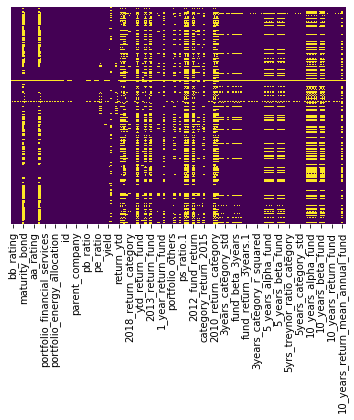

In [14]:
#Let's reconfirm the understanding with heatmap
sns.heatmap(FundRating.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#From below graph, it is evident that values are missing (indicated by yellow bar)

In [15]:
#Labelling the variable based on size of the vehicle
cleanup_nums = { "greatstone_rating": {0:"zero", 1:"one" , 2:"two", 3:"three", 4: "four", 5:"five" }
                
               }
#Replacing in the data set
FundRating.replace(cleanup_nums, inplace=True)


In [16]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, FundRating, y=None):

        self.fill = pd.Series([FundRating[c].value_counts().index[0]
            if FundRating[c].dtype == np.dtype('O') else FundRating[c].median() for c in FundRating],
            index=FundRating.columns)

        return self

    def transform(self, FundRating, y=None):
        return FundRating.fillna(self.fill)
    
    
    #X = pd.DataFrame(data)
#xt = DataFrameImputer().fit_transform(FundRating)


In [17]:
FundRating = DataFrameImputer().fit_transform(FundRating)


In [18]:
FundRating.isnull().values.any(), FundRating.isna().values.any(), FundRating.columns[FundRating.isnull().any()]

(False, False, Index([], dtype='object'))

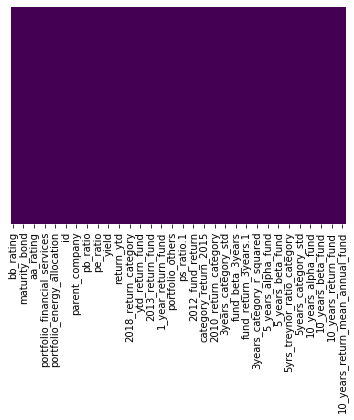

In [19]:
#Let's reconfirm the understanding with heatmap
sns.heatmap(FundRating.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
#Data clean up and analysis is completed. We are good to proceed further.
#Overall inference from the EDA is summarized below:
#Presence of nan values taken care
#Outliers treatment taken care

In [21]:
#Split the data into train and test 
#(Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [22]:
FundRating1=FundRating
FundRating=FundRating.drop(['greatstone_rating','fund_size','investment_class','mmc','pc_ratio','pe_ratio','ps_ratio.1','return_ytd','10yrs_treynor_ratio_fund','5yrs_treynor_ratio_fund','3yrs_treynor_ratio_fund','ps_ratio','inception_date','fund_id','category','fund_name','currency','parent_company'],axis=1)
#FundRating=FundRating.replace(",", "")
FundRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 108 entries, bb_rating to 10_years_return_category
dtypes: float64(107), int64(1)
memory usage: 20.6 MB


In [23]:
#Labelling the variable based on size of the vehicle
cleanup_nums = { "investment_class": {"Blend":1, "Growth":2 ,"Value":3 },
                
                 "fund_size":  {"Small": 1, "Medium": 2 ,"Large":3 }
                
                #"greatstone_rating": {"zero":0, "one":1 , "two":2, "three":3, "four":4, "five":5 }
               }
#Replacing in the data set
FundRating.replace(cleanup_nums, inplace=True)

#FundRating['class'].unique()
#Inference: Labelling and replacement is reflecting successfully

In [24]:
def replace_outlier(FundRating_in, col_name):
    q1 = FundRating_in[col_name].quantile(0.25)
    q3 = FundRating_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    FundRating_in[col_name]=np.where((FundRating_in[col_name] < fence_low), FundRating_in[col_name].quantile(0.25), FundRating_in[col_name])
    FundRating_in[col_name]=np.where((FundRating_in[col_name] > fence_high), FundRating_in[col_name].quantile(0.75), FundRating_in[col_name])
    #     FundRating_in[col_name]=np.where(FundRating_in.loc[FundRating_in[col_name] > fence_high], FundRating_in[col_name].median(),FundRating_in[col_name])
    #median=FundRating[col_name].median()
    #FundRating_in[col_name] = np.where((FundRating_in[col_name] > fence_high) | (FundRating_in[col_name] < fence_low), median, FundRating_in[col_name])
    return FundRating_in
    
df_columns = FundRating.columns
for i in range(df_columns.size):
    print(df_columns[i])
    FundRating=replace_outlier(FundRating, df_columns[i])

bb_rating
us_govt_bond_rating
below_b_rating
others_rating
maturity_bond
b_rating
a_rating
aaa_rating
aa_rating
bbb_rating
duration_bond
portfolio_communication_allocation
portfolio_financial_services
portfolio_industrials_allocation
portfolio_tech_allocation
portfolio_materials_basic_allocation
portfolio_energy_allocation
portfolio_consumer_defence_allocation
portfolio_healthcare_allocation
portfolio_property_allocation
id
portfolio_utils_allocation
portfolio_cyclical_consumer_allocation
fund_ratio_net_annual_expense
pb_ratio
total_assets
yield
2014_category_return
2012_return_category
years_up
2018_return_category
category_return_1year
cash_percent_of_portfolio
2011_return_category
ytd_return_fund
years_down
2014_return_fund
category_return_1month
2013_return_fund
fund_return_3months
ytd_return_category
2017_category_return
1_year_return_fund
2015_return_fund
portfolio_convertable
3_months_return_category
portfolio_others
2016_return_fund
stock_percent_of_portfolio
2016_return_catego

In [25]:
cleanup_nums = {
                "greatstone_rating": {"zero":0, "one":1 , "two":2, "three":3, "four":4, "five":5 }
               }
#Replacing in the data set
FundRating1.replace(cleanup_nums, inplace=True)


In [26]:
#Split the data into train and test 
#(Suggestion: specify “random state” if you are using train_test_split from Sklearn)

#Importing required libaries
from sklearn.model_selection import train_test_split
import os

#Drop the target 'class' from data
#x=FundRating.drop('greatstone_rating',axis=1)
x=FundRating
y=FundRating1['greatstone_rating']
# Splitting the dataset into the Training set and Test set
# x_train,x_val,x_test,y_train,y_val,y_test=train_test_split(x,y,train_size=0.50, val_size=0.30, test_size=0.20,random_state=0)
# x_train, x_val, x_test
# y_train,y_val, y_test

In [27]:
from sklearn.datasets import load_svmlight_files
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=0)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75,random_state=0)
x_train, x_cv,x_test,y_train,y_cv, y_test


(       bb_rating  us_govt_bond_rating  below_b_rating  others_rating  \
 22331       0.00                  0.0            0.00           0.00   
 10962       3.64                  0.0            0.00           0.32   
 8422        0.02                  0.0            0.00           0.00   
 3081        0.00                  0.0            0.00           0.00   
 10287       5.64                  0.0            0.10           0.32   
 ...          ...                  ...             ...            ...   
 13123       2.42                  0.0            0.10           0.32   
 19648       2.26                  0.0            0.10           0.32   
 9845        2.24                  0.0            0.02           0.52   
 10799       2.19                  0.0            0.15           0.00   
 2732        0.00                  0.0            0.00           0.00   
 
        maturity_bond  b_rating  a_rating  aaa_rating  aa_rating  bbb_rating  \
 22331           7.29      0.00    0.0000 

In [28]:
#Do data Scaling/Normalization if required
#This is needed we have variables in different scale ex: scaled_variance.1 etc
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_cv= sc.fit_transform(x_cv)
x_test = sc.fit_transform(x_test)
x=sc.fit_transform(x)
#y=sc.fit_transform(y)


In [29]:
#Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [30]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(x_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)

Covariance Matrix 
%s [[ 1.00005334  0.          0.73605327 ... -0.45076793 -0.35747073
  -0.29231193]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.73605327  0.          1.00005334 ... -0.41338523 -0.30947979
  -0.24978274]
 ...
 [-0.45076793  0.         -0.41338523 ...  1.00005334  0.55257107
   0.73245153]
 [-0.35747073  0.         -0.30947979 ...  0.55257107  1.00005334
   0.66343671]
 [-0.29231193  0.         -0.24978274 ...  0.73245153  0.66343671
   1.00005334]]
Eigenvectors 
[[-0.08793344 -0.13118343 -0.09306851 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.07814703 -0.13004672 -0.09599143 ...  0.          0.
   0.        ]
 ...
 [ 0.15553698  0.09011656 -0.00282645 ...  0.          0.
   0.        ]
 [ 0.13912118 -0.0115364   0.07007566 ...  0.          0.
   0.        ]
 [ 0.15875077 -0.06576649  0.04623367 ...  0.          0.
   0.        ]]


In [31]:
print('\nEigenvalues \n%s' %e_vals)


Eigenvalues 
[2.94690901e+01 1.01332484e+01 7.77448308e+00 4.48294872e+00
 4.28055667e+00 3.19229044e+00 2.15190483e+00 2.09472315e+00
 1.85245791e+00 1.69335798e+00 1.64581559e+00 1.41586268e+00
 1.19819065e+00 1.06873613e+00 1.00563276e+00 9.65523849e-01
 9.35695449e-01 8.95239707e-01 8.75882881e-01 8.10261991e-01
 7.87005926e-01 7.50927880e-01 7.11182964e-01 6.95256359e-01
 6.76947225e-01 6.43523739e-01 6.35508910e-01 6.07518932e-01
 5.86174154e-01 5.50253122e-01 5.53110613e-01 5.21264888e-01
 5.04586927e-01 4.86153721e-01 4.77708981e-01 4.60424403e-01
 4.47323819e-01 4.32771323e-01 4.16460036e-01 4.10722505e-01
 3.99168841e-01 3.86347790e-01 3.79488146e-01 3.73203677e-01
 3.53555142e-01 3.42284687e-01 3.40755750e-01 8.90369548e-03
 1.55349610e-02 2.14692768e-02 2.06760183e-02 2.79655638e-02
 3.59933105e-02 3.31052843e-01 4.34206799e-02 4.26601855e-02
 3.25240303e-01 4.97598460e-02 5.61597486e-02 6.13455811e-02
 3.16461820e-01 6.58692495e-02 7.20592596e-02 7.55384063e-02
 8.1482949

In [32]:
# "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 29.46751846  39.60022639  47.37429483  51.85700447  56.13733285
  59.32945303  61.48124309  63.57585452  65.42821363  67.12148129
  68.76720911  70.18299628  71.38112303  72.44980216  73.45538129
  74.42085364  75.35649919  76.25169115  77.12752732  77.93774609
  78.72471005  79.47559788  80.18674291  80.88196219  81.55887331
  82.20236273  82.83783774  83.44532428  84.03146717  84.58454828
  85.13477205  85.65600914  86.16056916  86.64669695  87.12438045
  87.5847803   88.03208026  88.4648285   88.88126633  89.29196693
  89.69111448  90.07744167  90.45690957  90.83009334  91.18362963
  91.52589606  91.86663364  92.19766883  92.52289178  92.83933673
  93.14867181  93.44691305  93.73343845  94.01796506  94.29137556
  94.55910588  94.8236641   95.08061767  95.33455699  95.57929805
  95.8205506   96.0579618   96.27837344  96.48892767  96.69416919
  96.89268245  97.08909898  97.27520167  97.45187315  97.62426031
  97.79415684  97.95741358  98.11344219  98.26

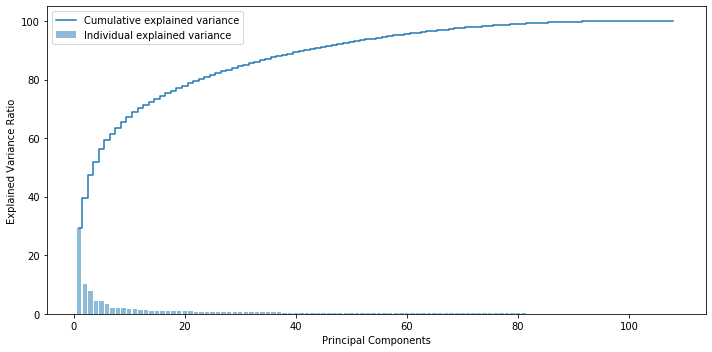

In [33]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#Inference: From below graph we can learn that ~95% data variance can be captured 
#when we take only ~ 60 variables from the original data set

In [34]:
#Proceeding with 6 components
pca_new = PCA(n_components=85)
#Fitting PCA into train data
pca_new.fit(x_train)
#Fitting PCA into test data
pca_new.fit(x_cv)
pca_new.fit(x_test)
pca_new.fit(x)
print(pca_new.components_)
print(pca_new.explained_variance_ratio_)
Xpca_train_new = pca_new.transform(x_train)
Xpca_cv_new = pca_new.transform(x_cv)
Xpca_test_new = pca_new.transform(x_test)
xpca=pca_new.transform(x)


[[ 8.84825695e-02 -0.00000000e+00  7.84793754e-02 ... -1.55075152e-01
  -1.39091407e-01 -1.58679810e-01]
 [-1.28485929e-01  1.11022302e-16 -1.28136579e-01 ...  8.99601096e-02
  -1.11106352e-02 -6.51111630e-02]
 [-9.32351176e-02  4.44089210e-16 -9.65323215e-02 ... -1.08923140e-03
   6.91113213e-02  4.54508327e-02]
 ...
 [-8.79676048e-03  7.38096390e-17  1.44637759e-02 ... -2.77987808e-01
   4.64796461e-02  1.49613090e-01]
 [ 2.65841631e-03  4.05041722e-16 -1.97318374e-02 ...  1.89648059e-02
   1.52238868e-01  8.97453811e-03]
 [-6.60535012e-03 -6.26215811e-17 -1.43774726e-02 ...  1.27952157e-01
   5.32544194e-02  4.36728116e-03]]
[0.2952843  0.10156645 0.07702095 0.04500944 0.04232903 0.03198961
 0.02132798 0.02079127 0.01855249 0.01696477 0.01646714 0.01410756
 0.01194819 0.01061775 0.01006595 0.00960442 0.00940098 0.0089203
 0.00877868 0.00815088 0.00794127 0.00752488 0.00708351 0.00693533
 0.00673298 0.00647589 0.00637339 0.00612907 0.00585071 0.00555636
 0.00550695 0.00522894 0.00505

In [35]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(x_train, y_train)
bgcl.score(x_train, y_train),bgcl.score(x_cv, y_cv)

(0.9906133333333333, 0.63024)

In [70]:
bgcl.score(x_test, y_test)

0.629

In [498]:
greatstone_rating=bgcl.predict(x_test)

In [499]:
greatstone_rating

array([5, 5, 4, ..., 3, 3, 4])

In [500]:
greatstone_rating1 = bgcl.predict(x)

In [501]:
greatstone_rating1

array([3, 3, 4, ..., 1, 2, 3])

In [502]:
greatstone_rating1 = pd.DataFrame(greatstone_rating1, columns=['greatstone_rating']).to_csv('submissionSVC7.csv')
#FundRating1=pd.DataFrame(FundRating1, columns=['fund_id']).to_csv('submissionSVC4.csv')

In [ ]:
greatstone_rating = pd.DataFrame(greatstone_rating, columns=['greatstone_rating']).to_csv('submissionSVC.csv')

In [503]:
#After PCA-SVC
svc.fit(Xpca_train_new, y_train)
svc.score(Xpca_train_new, y_train), svc.score(Xpca_cv_new, y_cv)

/Users/chai3/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.85504, 0.66512)

In [504]:
svc.score(Xpca_test_new, y_test)

0.6614

In [ ]:
greatstone_rating = svc.predict(x)

In [320]:
print (greatstone_rating)

[5 5 4 ... 3 3 3]


In [97]:
greatstone_rating = pd.DataFrame(greatstone_rating, columns=['greatstone_rating']).to_csv('sample_submission.csv')

In [ ]:
#Hyperparameter Tuning

In [90]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [92]:
param_dist = {"n_estimators":sp_randint(50,75),
              "max_samples":sp_randint(0,25),
              "bootstrap": [True],
              "oob_score":[True], 
              "random_state":[22]
             }
#max_samples= .7, bootstrap=True, oob_score=True
# #param_grid = {"C":[10],
#               "gamma":sp_randint(0.001,0.06), 
#               "kernel":['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
#              } 


In [93]:
# run randomized search
samples = 20  # number of random samples 
randomCV = RandomizedSearchCV(bgcl, param_distributions=param_dist,n_iter=samples,verbose=10) #default cv = 3

In [94]:
randomCV.fit(x_train, y_train)

/Users/chai3/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] bootstrap=True, max_samples=13, n_estimators=52, oob_score=True, random_state=22 
[CV]  bootstrap=True, max_samples=13, n_estimators=52, oob_score=True, random_state=22, score=0.465, total=   1.9s
[CV] bootstrap=True, max_samples=13, n_estimators=52, oob_score=True, random_state=22 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  bootstrap=True, max_samples=13, n_estimators=52, oob_score=True, random_state=22, score=0.472, total=   1.8s
[CV] bootstrap=True, max_samples=13, n_estimators=52, oob_score=True, random_state=22 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV]  bootstrap=True, max_samples=13, n_estimators=52, oob_score=True, random_state=22, score=0.469, total=   1.8s
[CV] bootstrap=True, max_samples=18, n_estimators=57, oob_score=True, random_state=22 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s remaining:    0.0s


[CV]  bootstrap=True, max_samples=18, n_estimators=57, oob_score=True, random_state=22, score=0.463, total=   2.0s
[CV] bootstrap=True, max_samples=18, n_estimators=57, oob_score=True, random_state=22 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.4s remaining:    0.0s


[CV]  bootstrap=True, max_samples=18, n_estimators=57, oob_score=True, random_state=22, score=0.475, total=   2.0s
[CV] bootstrap=True, max_samples=18, n_estimators=57, oob_score=True, random_state=22 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.4s remaining:    0.0s


[CV]  bootstrap=True, max_samples=18, n_estimators=57, oob_score=True, random_state=22, score=0.474, total=   2.0s
[CV] bootstrap=True, max_samples=23, n_estimators=56, oob_score=True, random_state=22 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.4s remaining:    0.0s


[CV]  bootstrap=True, max_samples=23, n_estimators=56, oob_score=True, random_state=22, score=0.475, total=   2.0s
[CV] bootstrap=True, max_samples=23, n_estimators=56, oob_score=True, random_state=22 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   13.4s remaining:    0.0s


[CV]  bootstrap=True, max_samples=23, n_estimators=56, oob_score=True, random_state=22, score=0.475, total=   2.0s
[CV] bootstrap=True, max_samples=23, n_estimators=56, oob_score=True, random_state=22 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.4s remaining:    0.0s


[CV]  bootstrap=True, max_samples=23, n_estimators=56, oob_score=True, random_state=22, score=0.474, total=   1.9s
[CV] bootstrap=True, max_samples=3, n_estimators=55, oob_score=True, random_state=22 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   17.4s remaining:    0.0s


[CV]  bootstrap=True, max_samples=3, n_estimators=55, oob_score=True, random_state=22, score=0.474, total=   1.8s
[CV] bootstrap=True, max_samples=3, n_estimators=55, oob_score=True, random_state=22 
[CV]  bootstrap=True, max_samples=3, n_estimators=55, oob_score=True, random_state=22, score=0.474, total=   1.8s
[CV] bootstrap=True, max_samples=3, n_estimators=55, oob_score=True, random_state=22 
[CV]  bootstrap=True, max_samples=3, n_estimators=55, oob_score=True, random_state=22, score=0.474, total=   1.8s
[CV] bootstrap=True, max_samples=8, n_estimators=54, oob_score=True, random_state=22 
[CV]  bootstrap=True, max_samples=8, n_estimators=54, oob_score=True, random_state=22, score=0.473, total=   1.8s
[CV] bootstrap=True, max_samples=8, n_estimators=54, oob_score=True, random_state=22 
[CV]  bootstrap=True, max_samples=8, n_estimators=54, oob_score=True, random_state=22, score=0.474, total=   1.8s
[CV] bootstrap=True, max_samples=8, n_estimators=54, oob_score=True, random_state=22 


[CV]  bootstrap=True, max_samples=19, n_estimators=59, oob_score=True, random_state=22, score=0.475, total=   2.0s
[CV] bootstrap=True, max_samples=1, n_estimators=53, oob_score=True, random_state=22 
[CV]  bootstrap=True, max_samples=1, n_estimators=53, oob_score=True, random_state=22, score=0.474, total=   1.8s
[CV] bootstrap=True, max_samples=1, n_estimators=53, oob_score=True, random_state=22 
[CV]  bootstrap=True, max_samples=1, n_estimators=53, oob_score=True, random_state=22, score=0.474, total=   1.8s
[CV] bootstrap=True, max_samples=1, n_estimators=53, oob_score=True, random_state=22 
[CV]  bootstrap=True, max_samples=1, n_estimators=53, oob_score=True, random_state=22, score=0.474, total=   1.8s
[CV] bootstrap=True, max_samples=6, n_estimators=74, oob_score=True, random_state=22 
[CV]  bootstrap=True, max_samples=6, n_estimators=74, oob_score=True, random_state=22, score=0.474, total=   2.6s
[CV] bootstrap=True, max_samples=6, n_estimators=74, oob_score=True, random_state=22 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.1min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=BaggingClassifier(base_estimator=None,
                                               bootstrap=True,
                                               bootstrap_features=False,
                                               max_features=1.0,
                                               max_samples=0.7, n_estimators=50,
                                               n_jobs=None, oob_score=True,
                                               random_state=22, verbose=0,
                                               warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributions={'bootstrap': [True],
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a20c54050>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a22618350>,
   

In [86]:
print(" Best cross-validation accuracy: {:.2f}". format( randomCV.best_score_)) 
print(" Best parameters: ", randomCV.best_params_) 
print(" Test set accuracy: {:.2f}". format( randomCV.score( x_cv, y_cv)))

 Best cross-validation accuracy: 0.47
 Best parameters:  {'bootstrap': True, 'max_samples': 16, 'n_estimators': 57}
 Test set accuracy: 0.46


In [ ]:
from sklearn.model_selection import GridSearchCV
#pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())]) 
pipe_svc = Pipeline([('scl', StandardScaler()),('rfcl', RandomForestClassifier())]) 
#param_grid = {'pca__n_components':[65],'svc__C': [0.001, 0.01, 0.1, 1,5,6,7,8,9,10], 'svc__gamma': [0.001,0.01,0.06,0.5,0.1,1,2,3,4,10], 'svc__kernel':['rbf','poly']} 

param_grid = {'svc__C': [10,],
              'svc__gamma': [0.05,0.06,0.07,], 
              'svc__kernel':['rbf']
             } 

grid = GridSearchCV( pipe_svc , param_grid = param_grid, cv = 5,verbose=10) 

grid.fit( x_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( x_cv, y_cv)))